In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)

In [5]:
df = pd.read_csv('C:\\Users\\Admin\\Documents\\Bengaluru_House_Data.csv')
df.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [6]:
df.shape

(13320, 9)

In [7]:
## I'll begin by examining the area type
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [8]:
## For the sake of simplicity I'm going to drop a few of the features:
df1 = df.drop(['area_type','availability','society','balcony'], axis = 'columns')
df1.head(10)


,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
5,Whitefield,2 BHK,1170,2.0,38.00
6,Old Airport Road,4 BHK,2732,4.0,204.00
7,Rajaji Nagar,4 BHK,3300,4.0,600.00
8,Marathahalli,3 BHK,1310,3.0,63.25
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00


Now begins the process of data cleaning:

In [9]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
##  I'm going to drop the data entries containing NA values for location and size:

df2 = df1.dropna(subset = ['location','size'], axis = 0)
df2.isnull().sum()

location       0
size           0
total_sqft     0
bath          57
price          0
dtype: int64

In [11]:
## The data entries containing NA values for no. of bathrooms will be replaced
##by the median value of the dataset:

df2 = df2.fillna({
    'bath': df2['bath'].median()
    
})


In [12]:
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [13]:
df2.shape

(13303, 5)

In [14]:
## Now that the missing values are taken of, I'm going to begin with the formatting of the data:
## The values in the size column do not seem to be uniform enough, which is why
## it'll require further investigation:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [15]:
df2['size'].value_counts()

2 BHK         5199
3 BHK         4309
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
10 BHK           2
11 Bedroom       2
13 BHK           1
18 Bedroom       1
16 BHK           1
27 BHK           1
12 Bedroom       1
14 BHK           1
19 BHK           1
43 Bedroom       1
Name: size, dtype: int64

In [16]:
# BHK and Bedroom will be considered to be similar.
# For ease of calculation, I'm going to consider BHK and RK to be the same.
df2['BHK'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))

In [17]:
df2.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [18]:
df2['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [19]:
# Houses with 43 rooms in a city like Bangalore seems to be a little mysterious.
# This area needs a bit more inspection:
df2[df2['BHK'] > 20]


,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [20]:
# It seems absurd that a 2400 sq ft house contains 43 rooms and so does the one with 27 rooms:
# I will not consider any data point with more than 20 bedrooms.
df2 = df2[df2['BHK'] <20]
df2.shape

(13301, 6)

In [21]:
# Let's examine the total_sqft feature first:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [22]:
# Some of the values in this variable appear to be in a certain range, we will replace it with the
# mid value of the range:
# At first I need to check the float values in the total_sqft column.

def is_float(x):
    try:
        float(x)
    except:
        return False
    return True


In [23]:
df2[~df2.total_sqft.apply(is_float)].head(20)

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,2.0,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,2.0,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
224,Devanahalli,3 BHK,1520 - 1740,2.0,74.820,3
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2


In [24]:
# The output contains those values of the dataframe whose total_sqft variable values are not float.
# Function for replacing total_sqft with midvalue:
def convert_to_mid_val(x):
    tokens = x.split('-')
    if len(tokens)==2:
        return((float(tokens[0]) + float(tokens[1]))/2)
    try:
        return float(x)
    except:
        return None

In [25]:
# just a trial:
convert_to_mid_val('2100-2850')

2475.0

In [26]:
df3 = df2.copy()
df3.total_sqft = df3.total_sqft.apply(convert_to_mid_val)
df3 = df3[df3.total_sqft.notnull()]
df3.head(10)

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


### Feauture Engineering and Dimensionality Reduction

In [27]:
df4 = df3.copy()


######  I'm going to create a new feature called 'price per sq ft' which generally is an important parameter in the 
###### real estate market.

In [28]:
df4['price_per_sqft'] = df4['price']*100000/df4['total_sqft']
df4.head(10)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


###### Up next I'm going to render some treatment to the categorical variable in the data which is the feature 'location'

In [29]:
len(df4.location.unique())

1297

In [30]:
df4.location = df4.location.apply(lambda x: x.strip())
location_stats = df4.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

location
Whitefield              538
Sarjapur  Road          397
Electronic City         304
Kanakpura Road          271
Thanisandra             236
                       ... 
Kumbhena Agrahara         1
Kudlu Village,            1
Konappana Agrahara        1
Kodanda Reddy Layout      1
1 Annasandrapalya         1
Name: location, Length: 1286, dtype: int64

In [31]:
location_stats[location_stats <= 10]

location
Basapura                 10
Dairy Circle             10
1st Block Koramangala    10
Sadashiva Nagar          10
Sector 1 HSR Layout      10
                         ..
Kumbhena Agrahara         1
Kudlu Village,            1
Konappana Agrahara        1
Kodanda Reddy Layout      1
1 Annasandrapalya         1
Name: location, Length: 1046, dtype: int64

###### We see that  1046 locations are such that they have 10 or less data points associated to them. The plan is to group all these together into an "other " category so that it eases the process of analysis in the later stages.

In [32]:
len(location_stats[location_stats > 10])

240

In [33]:
location_stats_less_than_ten = location_stats[location_stats <= 10]
location_stats_less_than_ten

location
Basapura                 10
Dairy Circle             10
1st Block Koramangala    10
Sadashiva Nagar          10
Sector 1 HSR Layout      10
                         ..
Kumbhena Agrahara         1
Kudlu Village,            1
Konappana Agrahara        1
Kodanda Reddy Layout      1
1 Annasandrapalya         1
Name: location, Length: 1046, dtype: int64

In [34]:
df4.location = df4.location.apply(lambda x: 'other' if x in location_stats_less_than_ten else x)
len(df4.location.unique())

241

In [35]:
df4.head(15)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


### Outlier Detection and Removal:

###### At the beginning, we will examine the parameter 'sqft per bedroom'. Given the fact that all of these houses contain a hall and a kitchen, it is judicial to exclude those data points whose 'sqft per bedroom' value is less than 300. The datapoints that do not meet this threshold will be safely removed as an outlier.

In [36]:
df4.shape

(13255, 7)

In [37]:
df4[(df4.total_sqft/df4.BHK) <300].head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [38]:
df5 = df4[~((df4.total_sqft/df4.BHK) <300)]
df5.shape

(12513, 7)

###### We will look at the descriptive statistics of the price_per_sqft column to check for any further outliers.

In [39]:
df5.price_per_sqft.describe()

count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

###### Both the minimum and the maximum values catch my interest here. In a city like Bangalore, it is rather hard to find a property worth 267 Rs per sqft and Rs 176470 per sqft seems to be very high amount as well. Although the latter might be justified by its prime location. We will investigate further.

###### We will group our data set by the parameter 'location' and then compute the mean and standard deviation for that particular group. We will exclude all those data points as outliers that lie below (mean-std) and above (mean+std) for each subgroup.
###### We will now write a function for the same.

In [88]:
def remove_pps_outliers(df):
    df_outcome = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        mean = np.mean(subdf.price_per_sqft)
        std  = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (mean - std)) & ((subdf.price_per_sqft) <= (mean+std))]
        df_outcome = pd.concat([df_outcome, reduced_df], ignore_index = True )
    return df_outcome

df6 = remove_pps_outliers(df5)
df6.shape

(10288, 7)

###### We will now check the prices of 2 and 3 BHK apartments for a particular location using a function defined below:

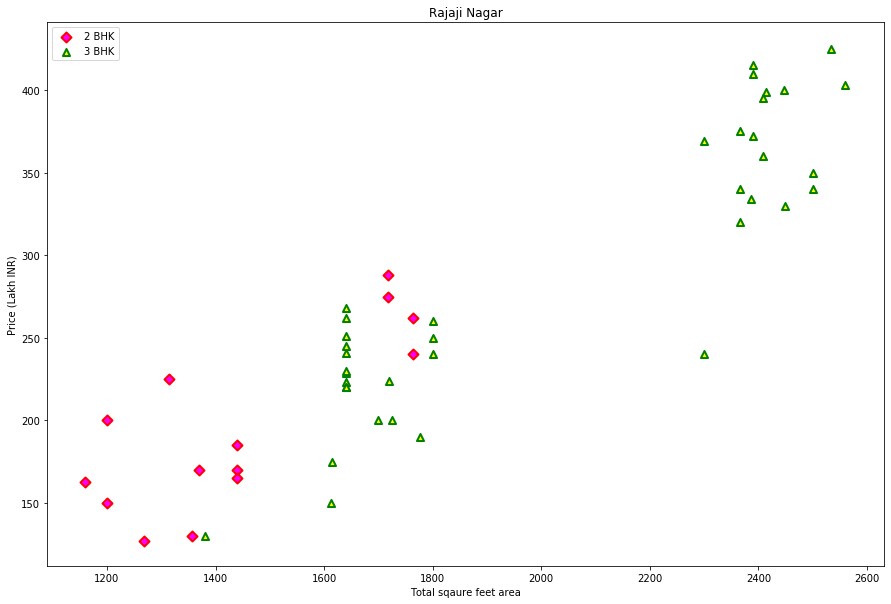

In [41]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location == location) & (df.BHK == 2)]
    bhk3 = df[(df.location == location) & (df.BHK == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price, label = '2 BHK', color = 'magenta', marker = 'D',edgecolor = 'red',linewidths = 2, s = 50)
    plt.scatter(bhk3.total_sqft, bhk3.price, label = '3 BHK', color = 'yellow', marker = '^',edgecolor = 'green',linewidths = 2, s = 50)
    plt.title(location)
    plt.legend()
    plt.xlabel("Total sqaure feet area")
    plt.ylabel("Price (Lakh INR)")
    
    
    
plot_scatter_chart(df6, "Rajaji Nagar")

###### It is evident from the figure above that some 2 BHK flats have a higher price than a 3 BHK flat although they belong to the same location.

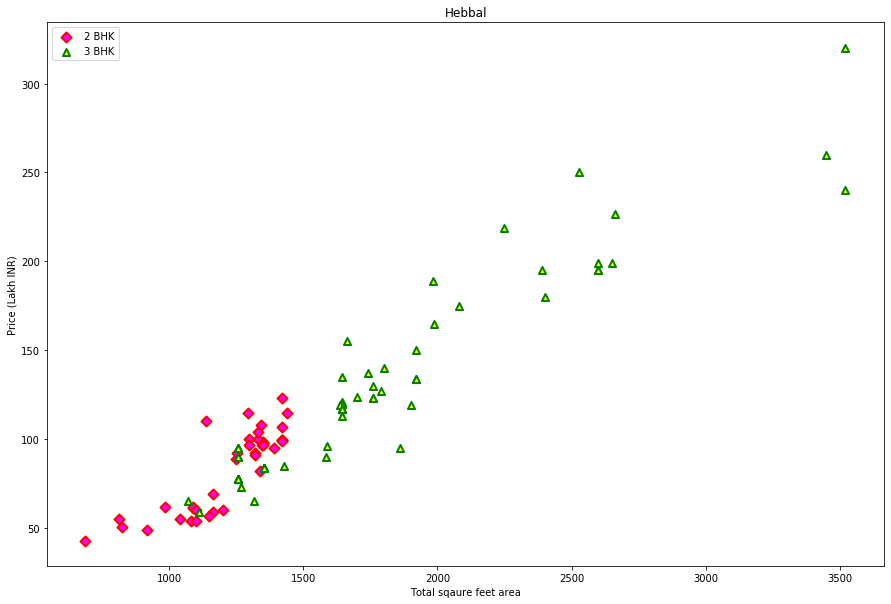

In [42]:
plot_scatter_chart(df6, "Hebbal")

###### We will now write a function which will remove the 2 BHK apartments of a particular region whose prices are less than the mean price of  1 BHK apartment in the same area. Similarly it'll reove the 3 BHK apartments whose price is less than the mean 2 BHK apartments in the same area and so on.

In [89]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')  



df7 = remove_bhk_outliers(df6)
df7.shape

(7342, 7)

###### Let's go ahead and see the difference in the scatter plots as a result of application of this function:

In [84]:
def plot_scatter_chart_1(df,location):
    bhk2 = df[(df.location == location) & (df.BHK == 2)]
    bhk3 = df[(df.location == location) & (df.BHK == 3)]
    matplotlib.rcParams['figure.figsize'] = (6,4)
    plt.scatter(bhk2.total_sqft, bhk2.price, label = '2 BHK', color = 'magenta', marker = 'D',edgecolor = 'red',linewidths = 2, s = 50)
    plt.scatter(bhk3.total_sqft, bhk3.price, label = '3 BHK', color = 'yellow', marker = '^',edgecolor = 'green',linewidths = 2, s = 50)
    plt.title(location)
    plt.legend()
    plt.xlabel("Total sqaure feet area")
    plt.ylabel("Price (Lakh INR)")
    

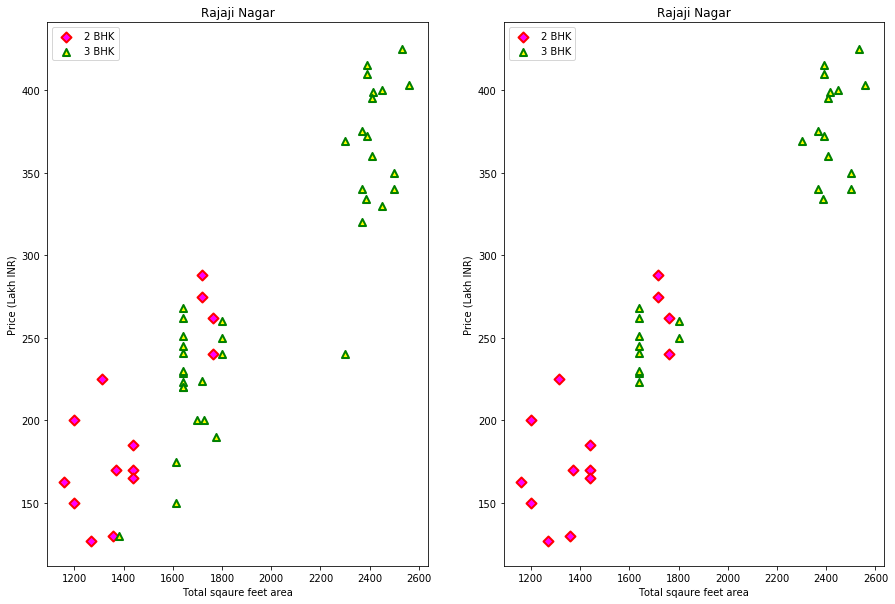

In [91]:
plt.subplot(1,2,1)
plot_scatter_chart_1(df6, "Rajaji Nagar")
plt.subplot(1,2,2)
plot_scatter_chart_1(df7, "Rajaji Nagar")

###### By comparing the two plots above, it is evident that the function remove_bhk_outliers has successfully removed the 3 BHK apartments whose prices were lesser than the mean of the 2 BHK ones for the same location. We will compare the two figures for another location.

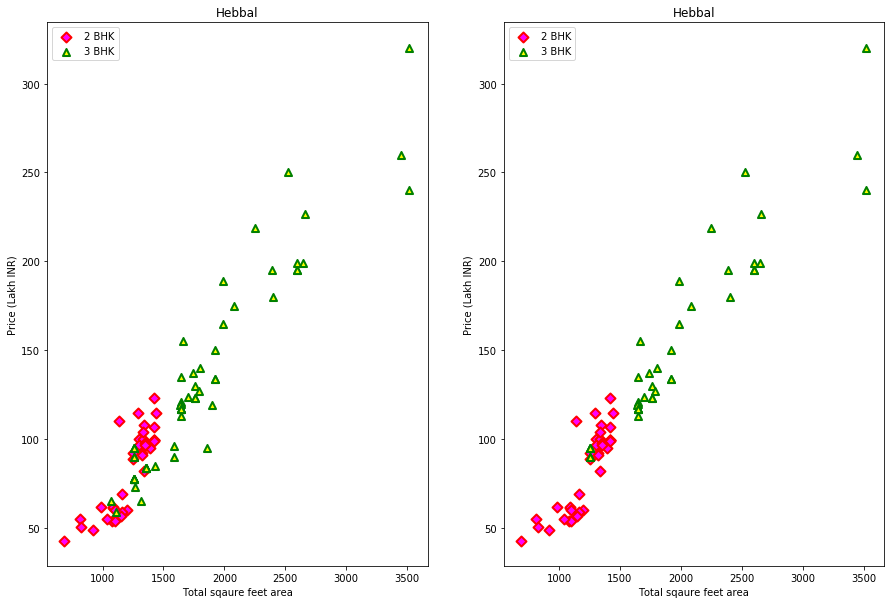

In [95]:
plt.subplot(1,2,1)
plot_scatter_chart_1(df6, "Hebbal")
plt.subplot(1,2,2)
plot_scatter_chart_1(df7, "Hebbal")

Text(0.5, 1.0, 'Histogram For the Price Per Sqft feature')

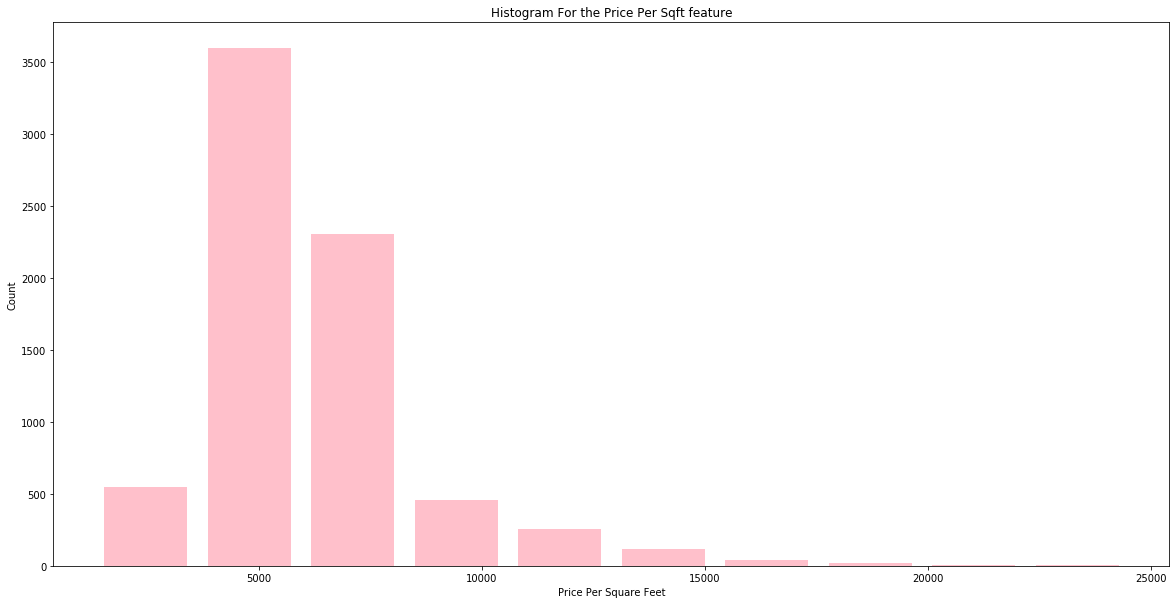

In [97]:
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df7.price_per_sqft, color = 'pink', rwidth = 0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")
plt.title("Histogram For the Price Per Sqft feature")

###### We see from the above histogram, that most of the values of the 'price per sqft' feature are in the range 5,000-15,000 which seems to be reasonable enough. We can thus say that our dataset is now a lot more realistic.

###### At last in the process of outlier detection and removal, we will take a close look at the 'bathroom' feature.

In [99]:
df7.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0.5, 1.0, 'Histogram for the No of Bathrooms')

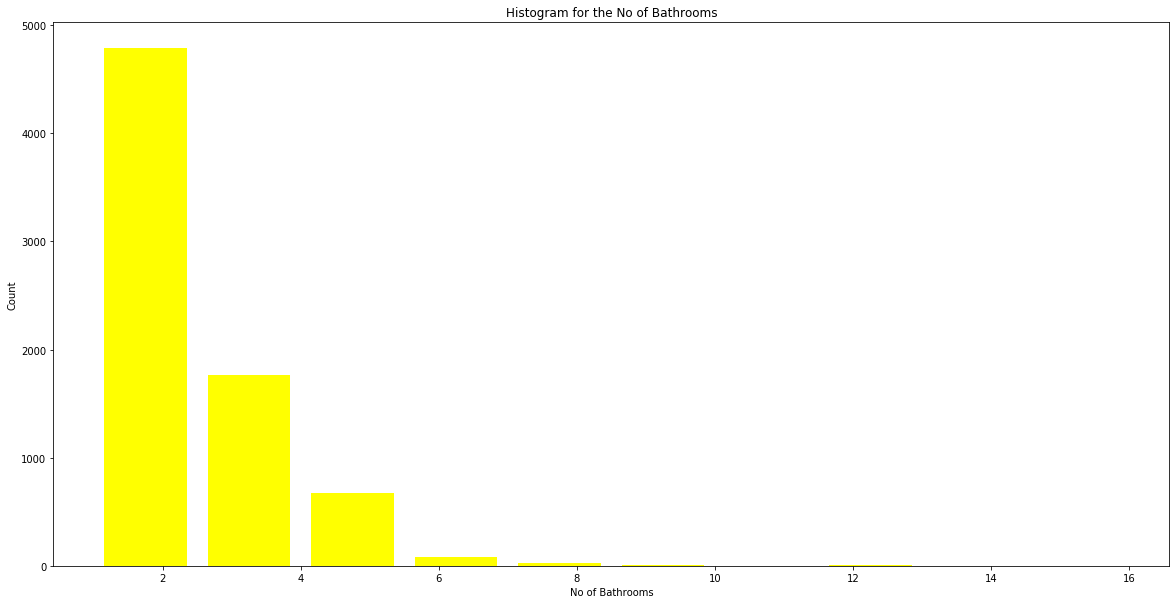

In [101]:
plt.hist(df7.bath, rwidth = 0.8, color = 'yellow' )
plt.xlabel("No of Bathrooms")
plt.ylabel("Count")
plt.title("Histogram for the No of Bathrooms")

In [102]:
df7[df7.bath > 10] 

,location,size,total_sqft,bath,price,BHK,price_per_sqft
5306,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8527,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8616,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9351,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9682,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


###### It can be observed from the figure above that there some enormous numbers of bathrooms present in some properties. We will exclude all the data points for which the number of bathrooms is '2' more than the number of bedrooms.

In [103]:
df7[df7.bath > df7.BHK + 2]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
1634,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5267,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6748,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8452,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [104]:
df8 = df7[df7.bath < df7.BHK + 2]
df8.shape

(7264, 7)

In [105]:
df8.head(5)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


###### Up next, I'm going to drop some unnecessary columns from my data set namely the 'size' column for which we have already created another column named 'BHK' and we will also drop the 'price_per_sqft' column as it was created solely for the purpose of data cleaning. 

In [110]:
df9 = df8.drop(['size','price_per_sqft'],axis = 'columns')
print(len(df9.location.unique()))
df9.head(3)

241


,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


###### Machine learning model will not be able to work with the string values of the categorical variable 'location' in our dataset, hence we will now opt for the method of **One Hot Encoding** . I will use Pandas dummies to execute the same.

In [107]:
dummy = pd.get_dummies(df9.location)
dummy.head(5)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


###### For each of these 241 unique values of location, we see a new dummy column has been introduced. In order to evade the problem of 'Dummy variable trap',  we will drop one out of these dummy variable columns. I'm picking the last column for this purpose.

In [111]:
df10 = pd.concat([df9, dummy.drop('other', axis = "columns")], axis = 'columns')
df10.head()

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
df11  = df10.drop('location',axis = 'columns')
print(df11.shape)
df11.head()

(7264, 244)


,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


###### We will now go on to build our model:

In [113]:
X = df11.drop(['price'], axis = 'columns')
X.shape

(7264, 243)

In [115]:
y = df11.price
print(len(y))
y.head(3)

7264


0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

###### We will now split our data set into a training and a test set using sklearn module.

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.3)

In [125]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.8533535977411918

###### I'm now going to use K-Fold cross validation technique to measure the accuracy of my linear regression model:

In [129]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits = 5, test_size = 0.3,random_state = 0)
cross_val_score(LinearRegression(), X, y , cv = cv)


array([0.80852963, 0.77179989, 0.85531977, 0.86964172, 0.8315457 ])

###### Out of these 5 iterations, the score value is above 80 % in four of the cases which seems to be decent enough. I'l like to test a few other algorithms for regression to see if the scores can be improved further. GridSearchCV will be used for this purpose. 

###### We will now find the best model using GridSearchCV:

In [135]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.819161,{'normalize': False}
1,lasso,0.661124,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.710098,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


###### Based on the above results, we can say that it'll be best to use the method of linear regression as it has the best score out of the three.

###### We will now write a function to predict prices of properties based on some given values of the features:


In [196]:
def predict_price(location, total_sqft, BHK, bath ):
    loc_index = np.where(X.columns == location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = total_sqft
    x[1] = BHK
    x[2] = bath
    
    if loc_index >= 0:
        x[loc_index] = 1
        
    return lr.predict([x])[0]

In [197]:
predict_price('1st Phase JP Nagar',1000,2,2)

92.63389197154038

In [200]:
predict_price('1st Phase JP Nagar',1000,3,2)

95.47554299407537

In [199]:
predict_price('Indira Nagar',1000, 2, 2)

180.47137866809618

In [201]:
predict_price('Indira Nagar',1000, 3, 3)

183.14065088445687

###### With that, training of the model is over. Next, I'm going to export this model to a pickle file so that it can be used for the purpose of prediction later. We will use the 'pickle' module in Python for this purpose.

In [203]:
import pickle
with open('Bangalore_price_prediction_model.pickle','wb') as f:
    pickle.dump(lr,f)

###### I'll export the all the column information i.e the information pertaining to the independent variables in a file which'll be used later for the purpose of prediction:

In [207]:
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open('Column_info.json','w') as f:
    f.write(json.dumps(columns))